# Centrality on a model network

Here we construct a simple model network as an illustrative tool. We then calculate various measures of centrality on this network. This serves two purposes:

1. Demonstrate what features are captured by different centrality measures.
2. Test Shapley value centrality calculations on a simple network.

In [1]:
#Import networkx and some functions defined for network analysis and visualization
import networkx as nx
from functions import *

In [2]:
# Construct the network
nodes = list(range(1, 14))
node_labels = [str(i) for i in nodes]
edges = [(1,4),(1,5),(1,6),(1,7),(1,8),(2,9),(2,10),(2,6),(2,7),(2,8),(3,9),(3,10),(8,11),(11,12),(11,13)]

G = nx.Graph()
G.add_nodes_from(nodes)#, label=node_labels)
G.add_edges_from(edges)
pos = nx.spring_layout(G)

counter = 0
for n in G.nodes(data=True):
  n[1]['label']=node_labels[counter]
  n[1]['title']=node_labels[counter]
  counter += 1

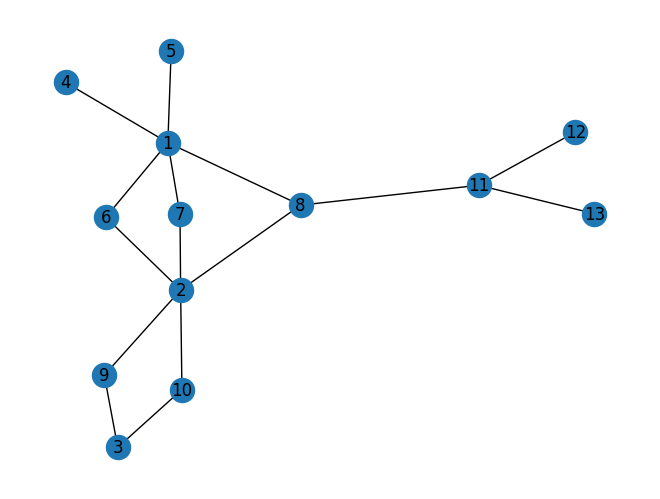

In [3]:
#Visualize the network
net = Network(notebook=True,height='800px', width='100%',heading='')
net.from_nx(G)
net.save_graph("output/model-network.html")

nx.draw(G, pos, with_labels=True)

In [4]:
#Compute degree centrality
degree_centrality = nx.degree_centrality(G)
saveGraph(G, pos, degree_centrality, "Degree")

#Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
saveGraph(G, pos, betweenness_centrality, "Betweenness")

#Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)
saveGraph(G, pos, closeness_centrality, "Closeness")

#Compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
saveGraph(G, pos, eigenvector_centrality, "Eigenvector")

#Compute pagerank
pagerank = nx.pagerank(G)
saveGraph(G, pos, pagerank, "Pagerank")

output/model-network-Degree.html
output/model-network-Betweenness.html
output/model-network-Closeness.html
output/model-network-Eigenvector.html
output/model-network-Pagerank.html


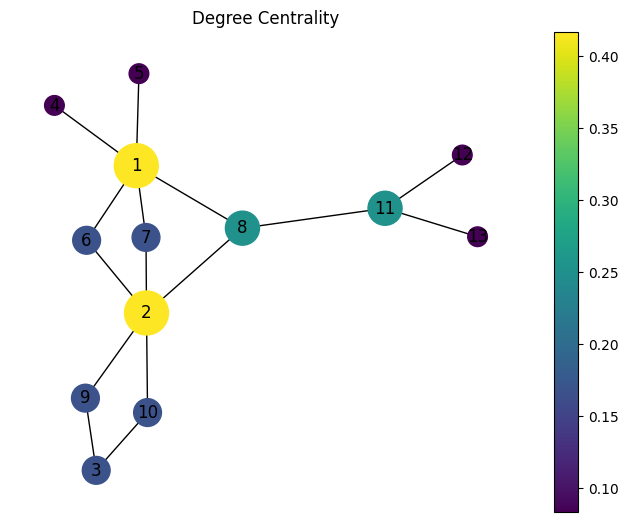

In [5]:
draw(G, pos, degree_centrality, 'Degree Centrality')

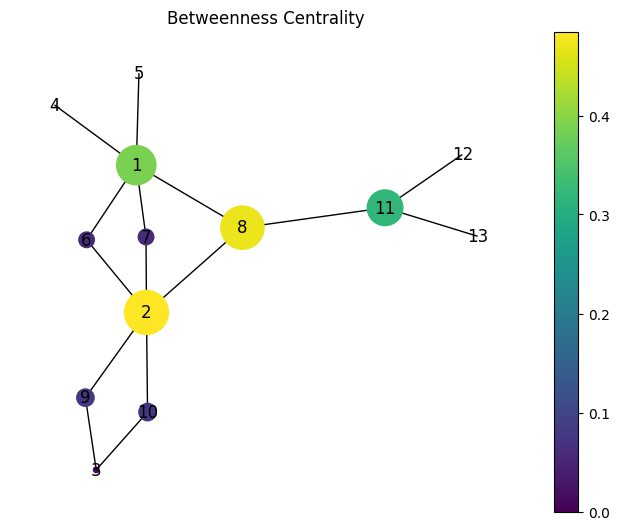

In [6]:
draw(G, pos, betweenness_centrality, 'Betweenness Centrality')

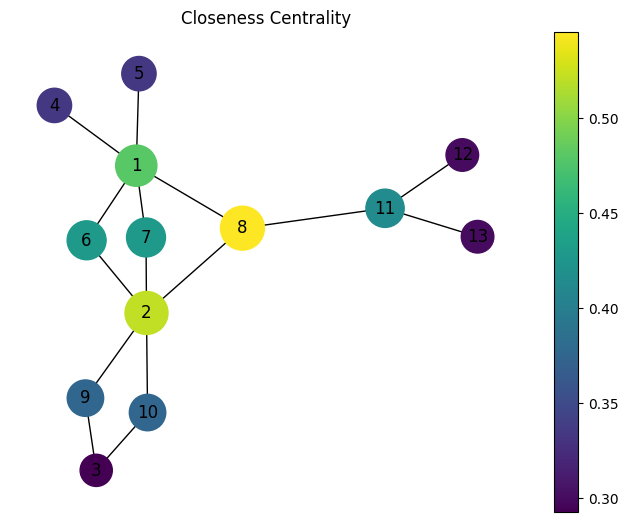

In [7]:
draw(G, pos, closeness_centrality, 'Closeness Centrality')

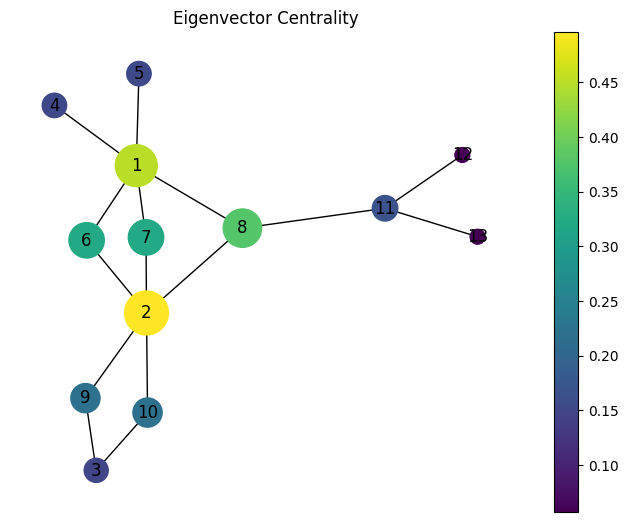

In [8]:
draw(G, pos, eigenvector_centrality, 'Eigenvector Centrality')

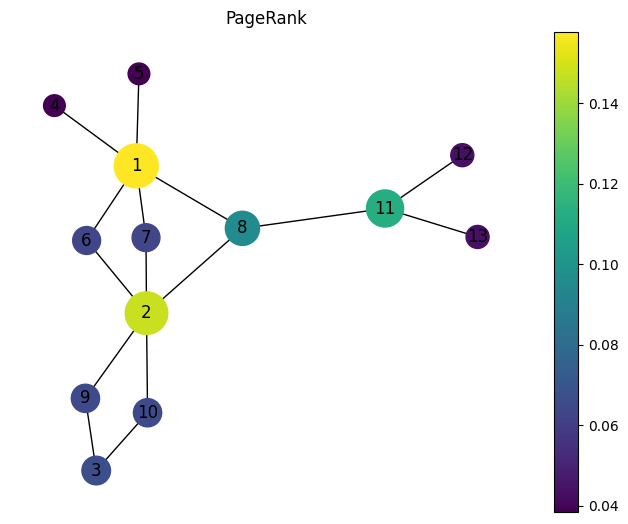

In [9]:
draw(G, pos, pagerank, 'PageRank')

# Shapley values

Defining different games on networks following [this paper](https://arxiv.org/abs/1402.0567).

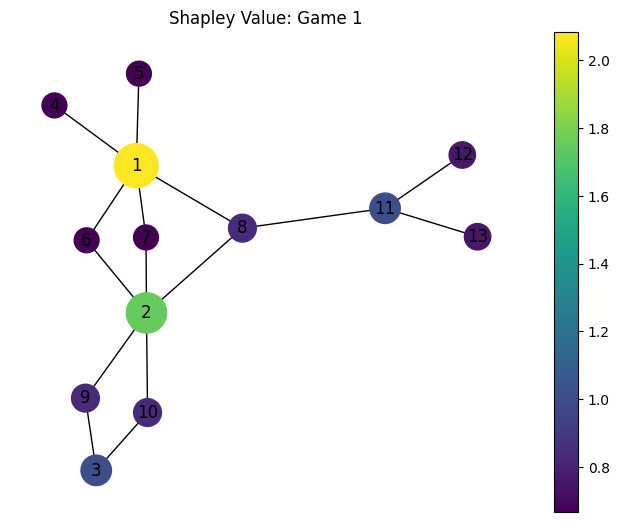

In [10]:
#Game 1
shapley_values = shapleyGame1(G)
draw(G, pos, shapley_values, 'Shapley Value: Game 1')

Game 2 is a generalized version of the first scenario. It values a coalition based on the number of members and number of nodes with at least k connections to members. The k=1 case is the same as above. By introducing k as an explicit parameter, we are able to tune how we value connections. My thoughts: this would be useful if our system has a specific threshold related to degree that is meaningful.

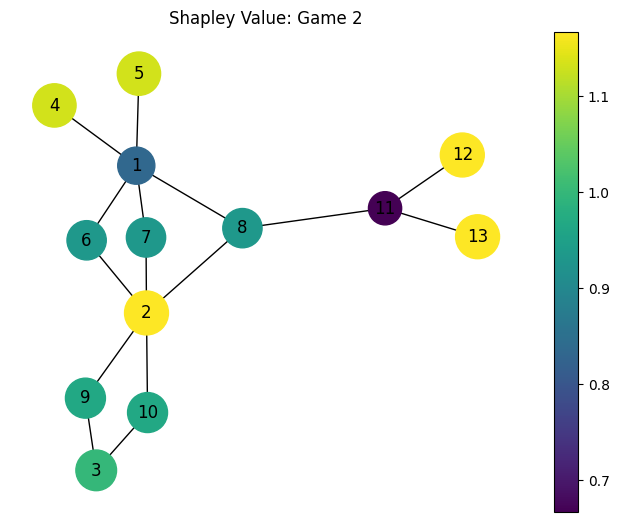

In [19]:
#Game 2
shapley_values = shapleyGame2(G, 2)
draw(G, pos, shapley_values, 'Shapley Value: Game 2')